note: usage: 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import MisrToolkit as mtk # needs python3.6
# from mpl_toolkits.basemap import Basemap # needs python 3.8?
import sys # to check python version
import os
import glob
import datetime as dt

In [2]:
# if (old_trainig_ds == 'on'):

def rename_oldDS_columns(in_transect):
    # rename columns
    if (in_transect.iloc[:,5].name == ' firstLat'):
        in_transect.rename(columns={'#path':'path', ' orbit':'orbit', ' img_block':'block',\
                             ' line':'line', ' sample':'sample',\
                            ' firstLat':'lat', ' firstLon':'lon', ' npts':'npts',\
                            ' rms':'mean_ATM_roughness'}, inplace=True)
    
    
    if (in_transect.iloc[:,5].name == ' lat'):
        in_transect.rename(columns={'#path':'path', ' orbit':'orbit', ' img_block':'block',\
                                     ' line':'line', ' sample':'sample',\
                                    ' lat':'lat', ' lon':'lon', ' npts':'npts',\
                                    ' rms':'mean_ATM_roughness'}, inplace=True)

    print(in_transect.columns)
    
    return 0
    

In [3]:
def plot_error_mesh(subtract_error_2d):
    
    import matplotlib.pyplot as plt

    color_map = plt.imshow(subtract_error_2d)
    # color_map.set_cmap("OrRd")
    # color_map.set_cmap("Greys")
    # color_map.set_cmap("YlOrBr")
    # color_map.set_cmap("gist_yarg")
#     color_map.set_cmap("binary") 
    color_map.set_cmap("bwr")
    # color_map.set_cmap("Blues")

    plt.colorbar()

    plt.show()

    return 0

# ref: https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [4]:
# from matplotlib import image as pltimg, pyplot as plt  #  pyplot uses the actual RGB values as they are, more accurate than PIL

def plot_here_and_write(in_arr, img_dir):
    write_mode = 0
#     img_label = 'path_'+path_num+'_'+'blocks_'+str(start_block)+'_'+str(end_block)+'_cam_'+cam
    img_format = ".jpg"
    %matplotlib inline 

    plt.gray() # This will show the images in grayscale as default

    plt.figure(figsize=(30,30))  # set the figure size

    plt.imshow(in_arr)
    plt.show()
    
    if (write_mode):
        print('save mode: on, we write images to disc')
        
        out_img = img_label+img_format
        out_img_fullpath = os.path.join(img_dir, out_img)
        print("-> output img is: %s" %out_img_fullpath)
        pltimg.imsave(out_img_fullpath, in_arr)
        #     plt.savefig(out_img)
    
    return 0


In [5]:
def remove_negatives(in_df, column_label):
    # remove negative values from DF

    index_list = in_df.loc[in_df[column_label] < 0].index
    print("size of list before removing negative MISR-rough data: %s" %len(in_df))

    in_df.drop(index_list, axis='index', inplace=True)
    print("size of list after removing negative MISR-rough data: %s" %len(in_df))
    
    return 0 # changes are inplace

## setup path to predicted roughness directory 

In [6]:
# sim_month = 'July_2016'
# sim_month_hist_label = 'July 2016'
# atm_npts = 10

sim_month = 'April_2016'
sim_month_hist_label = 'April 2016'
atm_npts = 10

In [7]:
# model output dir == roughness dir
predicted_roughness_dir = "/Volumes/Ehsan-7757225325/2016/april_2016/predict_roughness_k_zero_npts_10/all_roughness_files"
# roughness_dir = "/Volumes/Ehsan-7757225325/2016/july_2016/test_notCloudy_july_to_Mac"

# check roughness dataset

print(predicted_roughness_dir)
print('roughness directory found: %s' %os.path.isdir(predicted_roughness_dir))


/Volumes/Ehsan-7757225325/2016/april_2016/predict_roughness_k_zero_npts_10/all_roughness_files
roughness directory found: True


## setup path to observed roughness directory 

In [8]:
# atmmodel dir
atmmodel_dir = "/Volumes/Ehsan-7757225325/2016/april_2016/atmmodel/atmmodel_k_zero/3cameras"
# atmmodel_dir = "/Volumes/Ehsan-7757225325/2016/july_2016/atmmodel"

atmmodel_csv = "atmmodel_april_2016_k_zero.csv"
# atmmodel_csv = "atmmodel_july_2016_k_zero.csv"

# plot dir
plot_output_dir = "/Volumes/Ehsan-7757225325/2016/plot_dir"

In [9]:
atmmodel_csv_fp = os.path.join(atmmodel_dir, atmmodel_csv)
print('atmmodel.csv dataset found: %s'%(os.path.isfile(atmmodel_csv_fp)))

actual_roughness = pd.read_csv(atmmodel_csv_fp)
print(actual_roughness.shape)
print(actual_roughness.columns[0])

atmmodel.csv dataset found: True
(43298, 15)
#path


## check and change column labels 

In [12]:
if (actual_roughness.columns[0] == '#path'):
    rename_oldDS_columns(actual_roughness)

Index(['path', 'orbit', 'block', 'line', 'sample', 'lat', 'lon', ' an', ' ca',
       ' cf', 'mean_ATM_roughness', ' weight', 'npts', ' cloud', ' var'],
      dtype='object')


### ==========================================================================

## we need some cloud mask or some sort of cloud-checking algorithm here to make sure the block is not cloudy

how examine a MISR block is not cloudy? we can open HDF file and check some things in it, 
we need a mask flag (dataset) here to open and check the flag and determine if the block 
is cloudy or not, and then we can decide to use it or not here!

we should run an algorithm on images and determine cloudiness ration/percent/probability 
in each MISR image and then we can write the % or ratio in a seperate dataset for each POB.


### ==========================================================================

In [16]:
# remove zeros

filter_zeros_cond = (actual_roughness['path']==0) & (actual_roughness['orbit']==0) & (actual_roughness['block']==0)

zero_index_list = actual_roughness.index[filter_zeros_cond].tolist()
print('number of zeros found in DS: %s' %len(zero_index_list))

actual_roughness.drop(labels=zero_index_list, axis=0, inplace=True)
# atm_transect.head()


number of zeros found in DS: 0


In [18]:
actual_roughness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43298 entries, 0 to 43297
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   path                43298 non-null  int64  
 1   orbit               43298 non-null  int64  
 2   block               43298 non-null  int64  
 3   line                43298 non-null  int64  
 4   sample              43298 non-null  int64  
 5   lat                 43298 non-null  float64
 6   lon                 43298 non-null  float64
 7    an                 43298 non-null  float64
 8    ca                 43298 non-null  float64
 9    cf                 43298 non-null  float64
 10  mean_ATM_roughness  43298 non-null  float64
 11   weight             43298 non-null  float64
 12  npts                43298 non-null  float64
 13   cloud              43298 non-null  int64  
 14   var                43298 non-null  float64
dtypes: float64(9), int64(6)
memory usage: 5.0 MB


## change dtype of columns to int

In [19]:
actual_roughness = actual_roughness.astype({'path':int, 'orbit':int, 'block':int, 'line':int, 'sample':int})
actual_roughness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43298 entries, 0 to 43297
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   path                43298 non-null  int64  
 1   orbit               43298 non-null  int64  
 2   block               43298 non-null  int64  
 3   line                43298 non-null  int64  
 4   sample              43298 non-null  int64  
 5   lat                 43298 non-null  float64
 6   lon                 43298 non-null  float64
 7    an                 43298 non-null  float64
 8    ca                 43298 non-null  float64
 9    cf                 43298 non-null  float64
 10  mean_ATM_roughness  43298 non-null  float64
 11   weight             43298 non-null  float64
 12  npts                43298 non-null  float64
 13   cloud              43298 non-null  int64  
 14   var                43298 non-null  float64
dtypes: float64(9), int64(6)
memory usage: 5.0 MB


## filter dataset for ATM roughness threshold

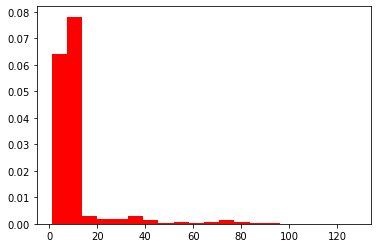

In [21]:
plt.hist(actual_roughness['npts'], density=True, bins=20, label='npts', color='red', alpha=1)  # density=False would make counts
plt.show()


## filter for npoints >= 10 and write out new dataset


shape of filtered DS: (33086, 15)


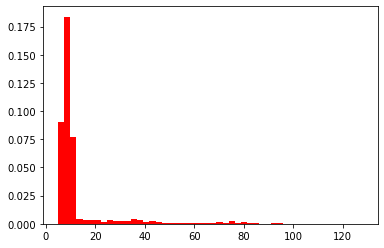

In [23]:
threshold_cut = 5
atm_transect_npts_filtered = actual_roughness.loc[actual_roughness['npts']>=threshold_cut]
print('shape of filtered DS: (%s, %s)' %atm_transect_npts_filtered.shape)


plt.hist(atm_transect_npts_filtered['npts'], density=True, bins=50, label='npts', color='red', alpha=1)  # density=False would make counts
plt.show()



# write out the new filtered dataset 

# output_filename = "atmmodel_july_2016_k_zero_npts_larger"+str(threshold_cut)+".csv"
# output_ds = os.path.join(trainingDS_dir, output_filename)
# atm_transect_npts_filtered.to_csv(output_ds, index=False)
# print(output_ds)


## Select a single POB to extract transect and other info


In [24]:
# note: we selected an arbiterary POB as following 
# Arbitrary POB (from unique POB)

####################################################
# April-2016
# pob_notCloudy_list = [[97, 86904, 25, 3.0],
#                             [88, 86918, 27, 1.0],
#                             [97, 86904, 26, 10.0],
#                             [97, 86904, 23,  8.0],
#                             [113, 86905, 21, 11.0],
#                             [79, 86932, 32, 8.0],
#                             [88, 86918, 28, 1.0],
#                             [79, 86932, 30,  8.0],
#                             [71, 87048, 26, 7.0],
#                             [79, 86932, 29,  8.0],
#                             [79, 86932, 28,  7.0],
#                             [97, 86904, 24, 1.0]]
####################################################
# Note: this info is for selecting a POB from atmmodel.csv

# April-2016
pob_notCloudy_list = [[79, 86932, 32]]


# July-2016
# pob_notCloudy_list = [[94, 88229, 30]]


print('total roughness images: %s' %len(pob_notCloudy_list))

pob_elem = 0
selected_path = pob_notCloudy_list[pob_elem][0]
selected_orbit = pob_notCloudy_list[pob_elem][1]
selected_block = pob_notCloudy_list[pob_elem][2]

print(selected_path)
print(selected_orbit)
print(selected_block)

total roughness images: 1
79
86932
32


procedure: 


1- check POB images in the new atmmodel_k_zero.csv file and check if they are dark or cloudy

2- pick a POB image that is not cloudy and is available

3- prediction: compute roughness array for that POB

4- then plot transect: compare model against truth 

5- confirm this is the best atmmodel with npts and k=today

6- prediction for all images

7- array2raster, geolocate, mosaics, maps

In [ ]:
# # delete the first column

# atm_transect_small.drop(labels='Unnamed: 0', axis=1, inplace=True)
# atm_transect_small.columns

In [26]:
# set filters to select a MISR block in atmmodel.csv dataset

path_filter = (actual_roughness['path']==selected_path)
orbit_filter = (actual_roughness['orbit']==selected_orbit)
block_filter = (actual_roughness['block']==selected_block)

atm_transect_in_block = actual_roughness.loc[path_filter & orbit_filter & block_filter]
print('Shape of our dataset after filtering for our target block... (%s, %s)' %atm_transect_in_block.shape)
atm_transect_in_block.head()


Shape of our dataset after filtering for our target block... (634, 15)


,path,orbit,block,line,sample,lat,lon,an,ca,cf,mean_ATM_roughness,weight,npts,cloud,var
4914,79,86932,32,0,667,72.781010,204.529114,0.673427,0.793588,0.805800,11.963750,1.0,8.0,-1,1.973208
4915,79,86932,32,1,667,72.779082,204.525051,0.695570,0.807917,0.826152,10.442000,1.0,5.0,-1,3.198821
4916,79,86932,32,1,666,72.777874,204.522484,0.718040,0.829083,0.826804,9.922500,1.0,4.0,-1,3.436040
4917,79,86932,32,2,666,72.776912,204.520435,0.729600,0.841458,0.834945,15.135556,1.0,9.0,-1,7.150419
4918,79,86932,32,3,666,72.774747,204.515830,0.738718,0.851878,0.838201,9.667778,1.0,9.0,-1,4.511040


## write out ATM transect for shapefile

In [ ]:
# # write some portion of it

# atm_transect_in_block['lon_West'] = atm_transect_in_block['lon']-360

# trans_to_shapefile_df = atm_transect_in_block
# # trans_to_shapefile_df.to_csv(os.path.join(atmmodel_dir, 'atmmodel_april_2016_smallDS_transect_forshapefile.csv'), index=False)
# trans_to_shapefile_df.to_csv(os.path.join(atmmodel_dir, 'atmmodel_july_2016_transect_forshapefile.csv'), index=False)


## change size of samples

In [27]:
# maybe if we want to select a smaller subset of the selected transect, like the first 100 points (or 10)

# max_step = 200
max_step = atm_transect_in_block.shape[0]

atm_transect_in_block = atm_transect_in_block.iloc[0:max_step]

In [28]:
atm_transect_in_block.shape

(634, 15)

In [29]:
print(atm_transect_in_block['mean_ATM_roughness'].min())
print(atm_transect_in_block['mean_ATM_roughness'].max())

4.72
41.29875


In [30]:
# sort by column ("line")

# atm_transect_in_block.sort_values(by='line', axis=0, inplace=True) # axis=0 == column names
# atm_transect_in_block.head(50)


In [31]:
# check for duplicates in rows of dataset???




In [32]:
# zfill() path and string it

if selected_path < 100:
    path_str = str(selected_path).zfill(3)
else:
    path_str = str(selected_path)


# zfill() block and string it
if selected_block < 10:
    block_str = str(selected_block).zfill(2)
else:
    block_str = str(selected_block)

In [35]:
#- finding our single roughness file from pattern of roughness.dat file

roughness_file_pattern = "roughness_toa_refl_P"+path_str+"_O0"+str(selected_orbit)+"_B0"+block_str+".dat"
print('looking for pattern: %s' %roughness_file_pattern)

# find roughness file
rough_file_list = glob.glob(os.path.join(predicted_roughness_dir, roughness_file_pattern))
print('found:')
print(rough_file_list)

if (len(rough_file_list) < 1):
    raise ValueError("roughness list is empty! did not find roughness file for your POB!")

if (len(rough_file_list) > 1):
    raise ValueError("roughness list has more that 1 file! there should be an error in our logic!")

looking for pattern: roughness_toa_refl_P079_O086932_B032.dat
found:
['/Volumes/Ehsan-7757225325/2016/april_2016/predict_roughness_k_zero_npts_10/all_roughness_files/roughness_toa_refl_P079_O086932_B032.dat']


In [36]:
# open roughness binary file and change binary to array

misr_rough_2d_arr = np.fromfile(rough_file_list[0], dtype=np.double)[0:1048576].reshape((512,-1))
print(misr_rough_2d_arr.shape)

(512, 2048)


In [37]:
print('min: %d' %misr_rough_2d_arr.min())
print('max: %d' %misr_rough_2d_arr.max())

min: -999994
max: 74


In [38]:
# extract lat lon arrays

misr_lat_2d_arr = np.fromfile(rough_file_list[0], dtype=np.double)[1048576:2097152].reshape((512,-1))
print(misr_lat_2d_arr.dtype)
print(misr_lat_2d_arr.shape)

misr_lon_2d_arr = np.fromfile(rough_file_list[0], dtype=np.double)[2097152:3145728].reshape((512,-1))
# print(misr_lon_2d_arr)


float64
(512, 2048)


In [39]:
# check value for sample lat-lon

for end_black in range(misr_rough_2d_arr.shape[1]):
    if misr_rough_2d_arr[0, end_black] > 0:
        print(end_black)
        break

361


In [40]:
# print(misr_rough_2d_arr[0, end_black-10])
# print(misr_lat_2d_arr[0, end_black-10])
# print(misr_lon_2d_arr[0, end_black-10])

<Figure size 432x288 with 0 Axes>

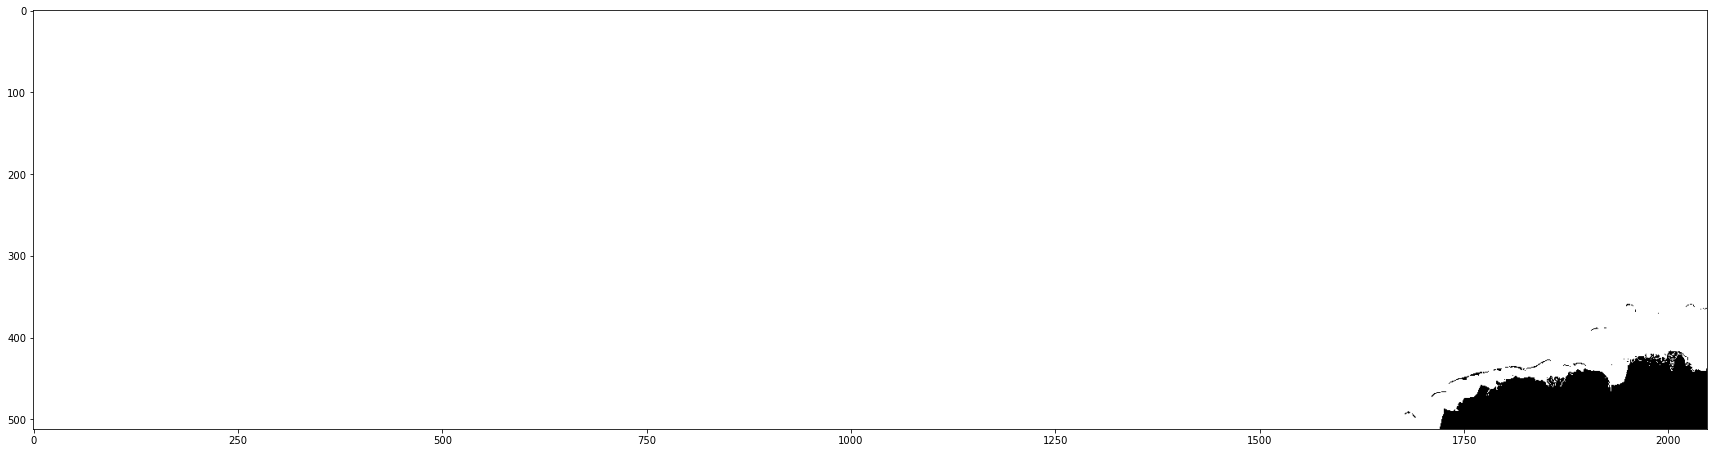

0

In [41]:
# plot roughness array from predcited/modeled roughness 

plot_here_and_write(misr_rough_2d_arr, atmmodel_dir)

In [42]:
# MVP with one line for lat-lon method

irow = 0

# find line/sample in the selected block
atm_line = atm_transect_in_block['line'].iloc[irow]
atm_sample = atm_transect_in_block['sample'].iloc[irow]
average_atm = atm_transect_in_block['mean_ATM_roughness'].iloc[irow]

atm_lat = atm_transect_in_block['lat'].iloc[irow]
atm_lon = atm_transect_in_block['lon'].iloc[irow]
if (atm_lon>180):
    atm_lon_west = atm_lon-360.0
    
print('%s, %s, %s, %s, %s' %(atm_line, atm_sample, average_atm, atm_lat, atm_lon_west))

0, 667, 11.96375, 72.78101, -155.470886


In [ ]:
# # extract MISR roughness based on single lat-lon

# atm_lat = 81.050398
# atm_lon = -152.181889 # should use ATM-lon West format

# abslat = np.abs(misr_lat_2d_arr - atm_lat) # element-wise
# abslon = np.abs(misr_lon_2d_arr - atm_lon) # element-wise

# abslon

# maximum = np.maximum(abslon, abslat)
# print(maximum)


# latlon_idx = np.argmin(maximum) # for flaten array and lat-lon
# print(latlon_idx)


# # extract MISR roughness w/lat-lon

# roughness_in_grid = misr_rough_2d_arr.flat[latlon_idx]
# roughness_in_grid


# line_atm = (latlon_idx/2048)
# print('line: %s' %line_atm)

# sample_atm = (line_atm%1)*2048
# print('sample: %s' %sample_atm)



# # extract MISR roughness w/line-sample

# rough = misr_rough_2d_arr[int(line_atm), int(sample_atm)]
# rough




In [ ]:
# # plot lat-lon diffs

# plot_error_mesh(c)
# # plot_error_mesh(abslon)

## find <roughess.dat> files == modeled roughness

* This section is very important because we have to find co-located observed (ATM) and modeled (MISR) roughness values for each pixel as our validation/performance test dataset. Then we use the dataset to calculate statistics about performance of our model prediction 

In [44]:
# misr_roughness_in_pixel_list = [] do not use it anymore
plot_ds = []

for irow in range(atm_transect_in_block.shape[0]):

    # find line/sample and mean ATM in the selected block
    atm_line = atm_transect_in_block['line'].iloc[irow]
    atm_sample = atm_transect_in_block['sample'].iloc[irow]
    average_atm = atm_transect_in_block['mean_ATM_roughness'].iloc[irow]
#     print(atm_line, atm_sample)
    
    atm_lat = atm_transect_in_block['lat'].iloc[irow]
    atm_lon = atm_transect_in_block['lon'].iloc[irow]
    
    if (atm_lon>180):
        atm_lon_west = atm_lon-360.0
        


    ######## we find MISR L-S==pixel that ATM sample falls into it   
    # each pixel
    misr_roughness_in_pixel_lineSample = misr_rough_2d_arr[atm_line, atm_sample]
    misr_neighborhood_ls = misr_roughness_in_pixel_lineSample
    
    
    # average of neighborhood 
#     misr_roughness_in_pixel_lineSample = misr_rough_2d_arr[atm_line, atm_sample]
#     misr_roughness_in_pixel_lineSample_up = misr_rough_2d_arr[atm_line-1, atm_sample]
#     misr_roughness_in_pixel_lineSample_down = misr_rough_2d_arr[atm_line+1, atm_sample]
#     misr_roughness_in_pixel_lineSample_before = misr_rough_2d_arr[atm_line, atm_sample-1]
#     misr_roughness_in_pixel_lineSample_after = misr_rough_2d_arr[atm_line, atm_sample+1]
#     misr_roughness_in_pixel_lineSample_up_before = misr_rough_2d_arr[atm_line-1, atm_sample-1]
#     misr_roughness_in_pixel_lineSample_up_after = misr_rough_2d_arr[atm_line-1, atm_sample+1]
#     misr_roughness_in_pixel_lineSample_down_before = misr_rough_2d_arr[atm_line+1, atm_sample-1]
#     misr_roughness_in_pixel_lineSample_down_after = misr_rough_2d_arr[atm_line+1, atm_sample+1]

#     misr_neighborhood_ls = [misr_roughness_in_pixel_lineSample,
#                            misr_roughness_in_pixel_lineSample_up,
#                            misr_roughness_in_pixel_lineSample_down,
#                            misr_roughness_in_pixel_lineSample_before,
#                            misr_roughness_in_pixel_lineSample_after,
#                            misr_roughness_in_pixel_lineSample_up_before,
#                            misr_roughness_in_pixel_lineSample_up_after,
#                            misr_roughness_in_pixel_lineSample_down_before,
#                            misr_roughness_in_pixel_lineSample_down_after]
    
    
    misr_roughness_in_pixel_ls = np.mean(misr_neighborhood_ls)
    print('LS mean: %s' %misr_roughness_in_pixel_ls)
    
    #################################################################
    
    # find MISR pixels based on lat-lon
    abslat = np.abs(misr_lat_2d_arr - atm_lat) # element-wise
    abslon = np.abs(misr_lon_2d_arr - atm_lon_west) # element-wise, should use ATM lon West format here
    # 
    maximum = np.maximum(abslon, abslat)
    latlon_idx = np.argmin(maximum) # for flaten array and lat-lon
    
    
    # based on lat-lon
    misr_roughness_in_pixel_latlon_in_pixel = misr_rough_2d_arr.flat[latlon_idx]
    misr_neighborhood_latlon = misr_roughness_in_pixel_latlon_in_pixel

    
    
    
#     misr_roughness_in_pixel_latlon_in_pixel = misr_rough_2d_arr.flat[latlon_idx]
#     misr_roughness_in_pixel_latlon_up = misr_rough_2d_arr.flat[latlon_idx-2048]
#     misr_roughness_in_pixel_latlon_down = misr_rough_2d_arr.flat[latlon_idx+2048]
#     misr_roughness_in_pixel_latlon_up_before = misr_rough_2d_arr.flat[latlon_idx-2048-1]
#     misr_roughness_in_pixel_latlon_up_after = misr_rough_2d_arr.flat[latlon_idx-2048+1]
#     misr_roughness_in_pixel_latlon_down_before = misr_rough_2d_arr.flat[latlon_idx+2048-1]
#     misr_roughness_in_pixel_latlon_down_after = misr_rough_2d_arr.flat[latlon_idx+2048+1]
#     misr_roughness_in_pixel_latlon_before = misr_rough_2d_arr.flat[latlon_idx-1]
#     misr_roughness_in_pixel_latlon_after = misr_rough_2d_arr.flat[latlon_idx+1]
    
    
    
    
#     misr_neighborhood_latlon = [misr_roughness_in_pixel_latlon_in_pixel,\
#                          misr_roughness_in_pixel_latlon_up,\
#                          misr_roughness_in_pixel_latlon_down,\
#                          misr_roughness_in_pixel_latlon_up_before,\
#                          misr_roughness_in_pixel_latlon_up_after,\
#                          misr_roughness_in_pixel_latlon_down_before,\
#                          misr_roughness_in_pixel_latlon_down_after,\
#                          misr_roughness_in_pixel_latlon_before,\
#                          misr_roughness_in_pixel_latlon_after]
                         

    
#     print(misr_neighborhood)
    misr_roughness_in_pixel_latlon = np.mean(misr_neighborhood_latlon)
    print('latlon mean: %s' %misr_roughness_in_pixel_latlon)
    



#     c = np.maximum(abslon, abslat)
#     latlon_idx = np.argmin(c) # for flaten array
#     roughness_in_grid = misr_rough_2d_arr.flat[latlon_idx]
#     print(roughness_in_grid)
    
    # append predixted value to our list
    plot_ds.append((atm_line, atm_sample, atm_lat, atm_lon_west, average_atm, misr_roughness_in_pixel_ls, misr_roughness_in_pixel_latlon)) #roughness_in_grid))

#     if misr_roughness > 1:
#         misr_roughness_in_pixel_list.append(misr_roughness)
#     else:
#         print('MISR roughness in pixel: %s' %misr_roughness)
#         raise ValueError("why MISR roughness is negative for an ATM location? model error? or something else?")

plot_ds_column_names = ['atm_lin', 'atm_sample', 'atm_lat', 'atm_lon_west', 'mean_ATM', 'modeled_roughness_in_pixel_lineSample', 'modeled_roughness_in_pixel_latlon']

print("\ntotal predicted roughness pixels found: %s" %len(plot_ds))


LS mean: 12.350728279648902
latlon mean: 14.687945955375081
LS mean: 14.687945955375081
latlon mean: 14.687945955375081
LS mean: 17.569882551382833
latlon mean: 14.687945955375081
LS mean: 13.894967960905293
latlon mean: 14.687945955375081
LS mean: 15.030744242830613
latlon mean: 14.687945955375081
LS mean: 13.043808971212822
latlon mean: 14.257438766460762
LS mean: 15.283361900477786
latlon mean: 15.930487020970133
LS mean: 13.532337789421284
latlon mean: 15.930487020970133
LS mean: 11.904400519054137
latlon mean: 15.930487020970133
LS mean: 23.427828828995526
latlon mean: 15.930487020970133
LS mean: 7.327054741873329
latlon mean: 16.154850190971256
LS mean: 8.203022956848145
latlon mean: 16.154850190971256
LS mean: 14.110067695493083
latlon mean: 14.723532770330566
LS mean: 15.64293089966663
latlon mean: 14.723532770330566
LS mean: 16.868204544579378
latlon mean: 14.723532770330566
LS mean: 13.67379876557658
latlon mean: 14.723532770330566
LS mean: 17.47047335645449
latlon mean: 14.7

latlon mean: 12.375576289139838
LS mean: 12.476538466628442
latlon mean: 12.375576289139838
LS mean: 12.862890224521179
latlon mean: 9.341724645580255
LS mean: 11.866547363464464
latlon mean: 11.866547363464464
LS mean: 12.014412013157934
latlon mean: 11.866547363464464
LS mean: 9.533035151817755
latlon mean: 9.533035151817755
LS mean: 19.73061047068079
latlon mean: 19.73061047068079
LS mean: 20.259613216172962
latlon mean: 19.94061608862752
LS mean: 18.66210378525686
latlon mean: 10.7356277089253
LS mean: 19.180348974754597
latlon mean: 10.7356277089253
LS mean: 11.093099280364822
latlon mean: 19.180348974754597
LS mean: 10.692588306292818
latlon mean: 11.093099280364822
LS mean: 10.68348001541673
latlon mean: 11.093099280364822
LS mean: 19.606383263150196
latlon mean: 19.606383263150196
LS mean: 12.98606022922661
latlon mean: 19.606383263150196
LS mean: 15.518181800842285
latlon mean: 15.518181800842285
LS mean: 15.225148501999211
latlon mean: 15.225148501999211
LS mean: 18.937370551

latlon mean: 17.556046664452634
LS mean: 18.537540118205758
latlon mean: 14.727827973596632
LS mean: 13.077226267403873
latlon mean: 14.727827973596632
LS mean: 14.727827973596632
latlon mean: 16.038872964460904
LS mean: 16.038872964460904
latlon mean: 16.038872964460904
LS mean: 15.669261330056717
latlon mean: 16.038872964460904
LS mean: 20.982588069817414
latlon mean: 16.038872964460904
LS mean: 19.92714122476645
latlon mean: 20.982588069817414
LS mean: 14.022492651101715
latlon mean: 20.982588069817414
LS mean: 16.41887382312772
latlon mean: 14.022492651101715
LS mean: 10.473799588519274
latlon mean: 14.022492651101715
LS mean: 17.607909379542267
latlon mean: 10.473799588519274
LS mean: 14.288152991381367
latlon mean: 10.473799588519274
LS mean: 14.707507534396012
latlon mean: 13.75271479149531
LS mean: 13.75271479149531
latlon mean: 13.75271479149531
LS mean: 15.07082134936764
latlon mean: 13.75271479149531
LS mean: 16.05728628044611
latlon mean: 13.75271479149531
LS mean: 17.93094

latlon mean: 9.621862375289725
LS mean: 9.621862375289725
latlon mean: 9.621862375289725
LS mean: 6.370999813079834
latlon mean: 9.621862375289725
LS mean: 5.414000034332275
latlon mean: 8.661765098571777
LS mean: 8.661765098571777
latlon mean: 8.661765098571777
LS mean: 13.194000244140625
latlon mean: 14.816892320930187
LS mean: 14.816892320930187
latlon mean: 14.816892320930187
LS mean: 14.42785294087764
latlon mean: 19.309444189609675
LS mean: 20.660824504585484
latlon mean: 19.309444189609675
LS mean: 19.83625328867987
latlon mean: 19.309444189609675
LS mean: 13.344326148328282
latlon mean: 19.83625328867987
LS mean: 14.383342754786707
latlon mean: 19.83625328867987
LS mean: 11.516522830906341
latlon mean: 11.516522830906341
LS mean: 11.862202155597096
latlon mean: 11.862202155597096
LS mean: 12.355305296152826
latlon mean: 11.862202155597096
LS mean: 13.776334912916724
latlon mean: 17.045249481174633
LS mean: 17.045249481174633
latlon mean: 17.045249481174633
LS mean: 13.659322674

latlon mean: 16.233879364882718
LS mean: 11.129450587388135
latlon mean: 11.129450587388135
LS mean: 11.551476507521363
latlon mean: 11.129450587388135
LS mean: 9.822475115715278
latlon mean: 11.551476507521363
LS mean: 10.78524554914302
latlon mean: 9.822475115715278
LS mean: 9.817506631431803
latlon mean: 9.822475115715278
LS mean: 10.073493839011963
latlon mean: 9.817506631431803
LS mean: 9.958081843450808
latlon mean: 9.817506631431803
LS mean: 11.386452646773067
latlon mean: 9.958081843450808
LS mean: 9.40635104868682
latlon mean: 9.958081843450808
LS mean: 11.506311515739382
latlon mean: 9.40635104868682
LS mean: 13.627121323901246
latlon mean: 9.40635104868682
LS mean: 11.44027437191677
latlon mean: 13.627121323901246
LS mean: 13.44004681220408
latlon mean: 13.627121323901246
LS mean: 23.81333351135254
latlon mean: 13.44004681220408
LS mean: 8.0
latlon mean: 13.44004681220408
LS mean: 8.0
latlon mean: 10.67727279663086
LS mean: 10.67727279663086
latlon mean: 10.67727279663086
LS

In [45]:
plot_ds_column_names

['atm_lin',
 'atm_sample',
 'atm_lat',
 'atm_lon_west',
 'mean_ATM',
 'modeled_roughness_in_pixel_lineSample',
 'modeled_roughness_in_pixel_latlon']

In [46]:
atm_transect_in_block.columns

Index(['path', 'orbit', 'block', 'line', 'sample', 'lat', 'lon', ' an', ' ca',
       ' cf', 'mean_ATM_roughness', ' weight', 'npts', ' cloud', ' var'],
      dtype='object')

In [47]:
# # build a single DF from both ATM and MISR lists and add "misr_roughness_in_pixel_list" to it

# atm_transect_in_block['MISR-roughness'] = misr_roughness_in_pixel_list
# atm_transect_in_block.columns

In [48]:
# # remove negative values from DF

# negative_misr_index_list = atm_transect_in_block.loc[atm_transect_in_block['MISR-roughness'] < 0].index
# print("size of list before removing negative MISR-rough data: %s" %len(atm_transect_in_block))
# atm_transect_in_block.drop(negative_misr_index_list, axis='index', inplace=True)
# print("size of list after removing negative MISR-rough data: %s" %len(atm_transect_in_block))


In [49]:
# row_count = atm_transect_in_block.shape[0]
# row_count

In [50]:
# build a dataframe from list of columns

eval_data = pd.DataFrame(plot_ds, columns=plot_ds_column_names)
# plot_df['modeled_roughness_in_pixel_latlon'].head(10)
print(eval_data.head())

   atm_lin  atm_sample    atm_lat  atm_lon_west   mean_ATM  \
0        0         667  72.781010   -155.470886  11.963750   
1        1         667  72.779082   -155.474949  10.442000   
2        1         666  72.777874   -155.477516   9.922500   
3        2         666  72.776912   -155.479565  15.135556   
4        3         666  72.774747   -155.484170   9.667778   

   modeled_roughness_in_pixel_lineSample  modeled_roughness_in_pixel_latlon  
0                              12.350728                          14.687946  
1                              14.687946                          14.687946  
2                              17.569883                          14.687946  
3                              13.894968                          14.687946  
4                              15.030744                          14.687946  


In [51]:
# remove -1 from dataset

remove_negatives(eval_data, 'modeled_roughness_in_pixel_latlon')
# plot_df

size of list before removing negative MISR-rough data: 634
size of list after removing negative MISR-rough data: 634


0

## plot transect

plot based on line-sample method

In [52]:
# x= range(plot_df.shape[0])
# fig1, ax = plt.subplots(figsize=(10, 6))
# # Specify how our lines should look
# ax.plot(x, plot_df['mean_ATM'], color='black', label='mean-ATM-per-pixel')
# ax.plot(x, plot_df['misr_roughness_in_pixel_lineSample'], color='red', label='MISR-estimate-per-pixel')
# # Same as above
# ax.set_ylim([0, 60])
# ax.set_xlabel('Arbitrary Distance Along ATM-MISR Transect')
# ax.set_ylabel('Roughness (cm)')
# ax.set_title('ATM and MISR-estimated Sea Ice Roughness LineSample_Pixel-based')
# ax.grid(True)
# ax.legend(loc='upper right')


# # save plot
# plot_name = "trans_linesample_"+sim_month+'_'+'npts_'+str(atm_npts)+'_p'+str(selected_path)+'_'+'o'+str(selected_orbit)+'_'+'b'+str(selected_block)
# # plot_name
# # plot_output_dir
# fig1.savefig(os.path.join(plot_output_dir, plot_name))



plot based on lat-lon method

/Volumes/Ehsan-7757225325/2016/plot_dir/trans_latlon_April_2016_npts_10_p79_o86932_b32.png


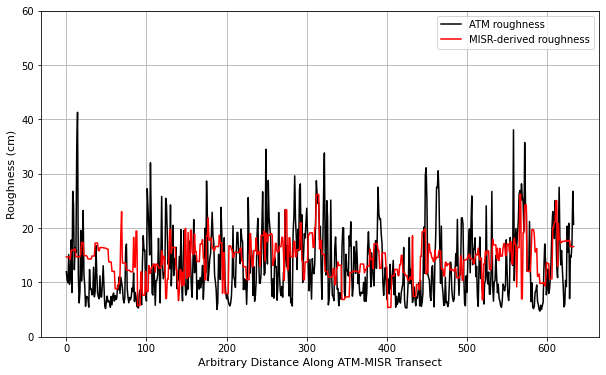

In [53]:
x= range(eval_data.shape[0])
fig2, ax = plt.subplots(figsize=(10, 6))
# Specify how our lines should look
ax.plot(x, eval_data['mean_ATM'], color='black', label='ATM roughness')
ax.plot(x, eval_data['modeled_roughness_in_pixel_latlon'], color='red', label='MISR-derived roughness')
# Same as above
ax.set_ylim([0, 60])
ax.set_xlabel('Arbitrary Distance Along ATM-MISR Transect', fontsize = 11)
ax.set_ylabel('Roughness (cm)', fontsize = 11)
# ax.set_title('ATM and MISR-estimated Sea Ice Roughness LatLon-based')
ax.grid(True)
ax.legend(loc='upper right')

plt.rc('legend', fontsize=11)    # legend fontsize

# save plot
plot_name = "trans_latlon_"+sim_month+'_'+'npts_'+str(atm_npts)+'_p'+str(selected_path)+'_'+'o'+str(selected_orbit)+'_'+'b'+str(selected_block)+'.png'
# plot_output_dir
save_path = os.path.join(plot_output_dir, plot_name)
print(save_path)
fig2.savefig(save_path)


In [54]:
# # x = range(len(misr_roughness_in_pixel_list))
# x= range(row_count)

# fig, ax = plt.subplots(figsize=(10, 6))

# # Specify how our lines should look
# ax.plot(x, atm_transect_in_block['mean_ATM_roughness'], color='black', label='mean-ATM-per-pixel')
# ax.plot(x, atm_transect_in_block['MISR-roughness'], color='red', label='MISR-estimated-per-pixel')

# # Same as above
# ax.set_xlabel('Arbitrary Distance Along ATM-MISR Transect')
# ax.set_ylabel('Roughness (cm)')
# ax.set_title('ATM and MISR-estimated Sea Ice Roughness')
# ax.grid(True)
# ax.legend(loc='upper right');

In [55]:
bin_size = 20

## histogram of transect

In [56]:
# plt.hist(plot_df['mean_ATM'], density=True, bins=bin_size, label='ATM', color='black', alpha=0.5)  # density=False would make counts
# plt.hist(plot_df['misr_roughness_in_pixel_lineSample'], density=True, bins=bin_size, label='MISR', color='red', alpha=0.5)  # density=False would make counts
# plt.xlim(0,80)

# plt.xlabel('Roughness')
# plt.ylabel('Frequency')
# plt.legend(loc="upper right")
# plt.title("Histogram")


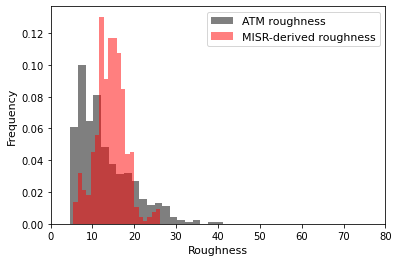

In [57]:
plt.hist(eval_data['mean_ATM'], density=True, bins=bin_size, label='ATM roughness', color='black', alpha=0.5)  # density=False would make counts
plt.hist(eval_data['modeled_roughness_in_pixel_latlon'], density=True, bins=bin_size, label='MISR-derived roughness', color='red', alpha=0.5)  # density=False would make counts
plt.xlim(0,80)

plt.xlabel('Roughness', fontsize = 11)
plt.ylabel('Frequency', fontsize = 11)
plt.legend(loc="upper right")
# plt.title("ATM vs. MISR for %s" %sim_month_hist_label)

plt.rc('legend', fontsize=11)    # legend fontsize

# save plot
plot_name = "hist_latlon_"+sim_month+'_'+'npts_'+str(atm_npts)+'_p'+str(selected_path)+'_'+'o'+str(selected_orbit)+'_'+'b'+str(selected_block)
plot_name
# plot_output_dir
plt.savefig(os.path.join(plot_output_dir, plot_name))


## statistics of transect

In [58]:
# describe the statistics

stats_atm = eval_data['mean_ATM'].describe()
print(stats_atm)

stats_name = "stats_atm_"+sim_month+'_'+'npts_'+str(atm_npts)+'_p'+str(selected_path)+'_'+'o'+str(selected_orbit)+'_'+'b'+str(selected_block)+'.csv'
print(stats_name)

stats_atm.to_csv(os.path.join(plot_output_dir, stats_name))


count    634.000000
mean      12.967014
std        6.373726
min        4.720000
25%        7.967163
50%       11.213889
75%       16.422837
max       41.298750
Name: mean_ATM, dtype: float64
stats_atm_April_2016_npts_10_p79_o86932_b32.csv


In [59]:
stats_misr = eval_data['modeled_roughness_in_pixel_latlon'].describe()
print(stats_misr)

stats_name = "stats_misr_predict_"+sim_month+'_'+'npts_'+str(atm_npts)+'_p'+str(selected_path)+'_'+'o'+str(selected_orbit)+'_'+'b'+str(selected_block)+'.csv'
print(stats_name)

stats_misr.to_csv(os.path.join(plot_output_dir, stats_name))


count    634.000000
mean      14.310772
std        3.623585
min        5.414000
25%       12.058947
50%       14.420185
75%       16.440001
max       26.228182
Name: modeled_roughness_in_pixel_latlon, dtype: float64
stats_misr_predict_April_2016_npts_10_p79_o86932_b32.csv


## R^2 on test data/ model prediction

we seperated out dataset to train+test. we used train dataset to build our KNN model. test dataset is some blocks that we kept aside and did not include in training dataset so that later we report our model performance on the test dataset. our test dataset are 2 predicted roughness blocks for April and July2016.

In [62]:
y_actual = eval_data['mean_ATM']
y_predicted = eval_data['modeled_roughness_in_pixel_latlon']

In [119]:
# Using sklearn
# from sklearn.metrics import r2_score

corr_matrix = np.corrcoef(y_actual, y_predicted)
corr = corr_matrix[0,1]
R_sq = corr**2
print('R^2 on test data: %s' %round(R_sq,2))

# r2_model = r2_score(y_actual, y_predicted)

R^2 on test data: 0.05


### plot R^2 for observation and modeled roughness

In [81]:
# fig, ax = plt.subplots()
# ax.scatter(y_actual, y_predicted)
# ax.plot([y_actual.min(), y_actual.max()], [y_predicted.min(), y_predicted.max()], 'k--', lw=4)
# ax.set_xlabel('Actual')
# ax.set_ylabel('Predicted')

# #regression line
# # y_test, y_predicted = y_test.reshape(-1,1), y_predicted.reshape(-1,1)
# # ax.plot(y_test, LinearRegression().fit(y_test, y_predicted).predict(y_test))

# plt.show()

# ## later download data and plot them in Excel

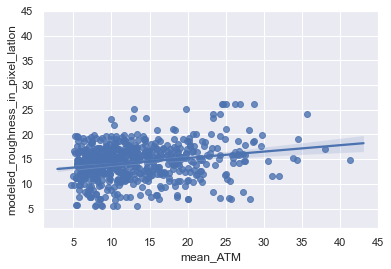

In [106]:
import seaborn as sns
fig, ax = plt.subplots()
sns.set_theme(color_codes=True)
sns.regplot(x=y_actual, y=y_predicted, truncate=False, ax=ax)#, color='g')
ax.set_xlim(1, 45)
ax.set_ylim(1, 45)
plt.show()

In [116]:
# To calculate the RMSE between the actual and predicted values

#import necessary libraries
from sklearn.metrics import mean_squared_error
from math import sqrt

#calculate RMSE
model_sqrt = sqrt((mean_squared_error(y_actual, y_predicted))) 
print('model RMSE: %s' %round(model_sqrt, 2))

model RMSE: 6.71


### Residual plot

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Residual plot')

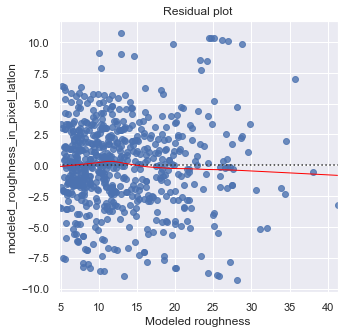

In [117]:
import seaborn as sns

# residuals = y_actual - y_predicted

fig, ax = plt.subplots(figsize =(5,5))
sns.residplot(y_actual, y_predicted, lowess=True, line_kws={'color': 'red', 'lw': 1, 'alpha': 1})

# ax.set(ylabel='residuals',xlabel='fitted values')

plt.xlabel("Modeled roughness")
plt.title('Residual plot')

## QQ plot

Text(0.5, 1.0, 'Normal Q-Q Plot')

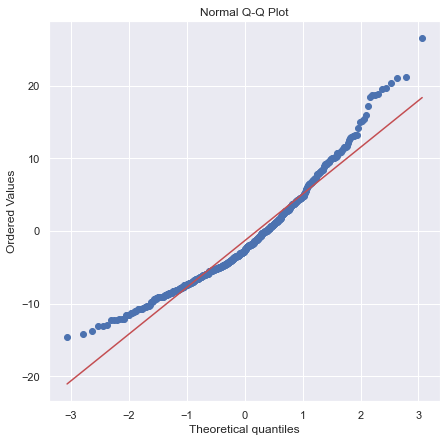

In [118]:
import scipy.stats as stats

residuals = y_actual - y_predicted
residuals

plt.figure(figsize=(7,7))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

## now calculate histogram and statistics for the whole BOX

In [ ]:
# misr_roughness_in_pixel_list_box = find_misr_roughness_per_pixel(atm_transect_small)

In [ ]:
# # build a single DF from both ATM and MISR lists and add "misr_roughness_in_pixel_list" to it

# atm_transect_small['MISR-roughness'] = misr_roughness_in_pixel_list_box
# atm_transect_small.columns

In [ ]:
# # remove negative values from DF

# negative_misr_index_list_box = atm_transect_small.loc[atm_transect_small['MISR-roughness'] < 0].index
# print("size of list before removing negative MISR-rough data: %s" %len(atm_transect_small))

# atm_transect_small.drop(negative_misr_index_list_box, axis='index', inplace=True)
# print("size of list after removing negative MISR-rough data: %s" %len(atm_transect_small))


## plot histogram for BOX

In [ ]:
# hist_bounds = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80]
# n, bins, bounds=plt.hist(atm_transect_small['mean_ATM_roughness'], density=True, bins=hist_bounds, label='ATM', color='black', alpha=0.5)  # density=False would make counts
# plt.hist(atm_transect_small['MISR-roughness'], density=True, bins=hist_bounds, label='MISR', color='red', alpha=0.5)  # density=False would make counts

# plt.xticks(bins)
# plt.xlabel('Roughness')
# # plt.xticks(range(10))

# plt.ylabel('Frequency')
# plt.legend(loc="upper right")
# plt.title("ATM vs. MISR for %s" %sim_month)
